In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import nltk
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
from textblob import TextBlob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys
sys.path.append('../Data preprocessing') 
import simple_feature_engineering as sf

In [42]:
df=pd.read_csv('../Datasets/FinalData1.csv')
print(df)

             Artist                    Song  \
0    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ             ԱՀԱ ԵՎ ՎԵՐՋ   
1    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ               ԱՄԵՆԸ ՁԵԶ   
2    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ  ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ   
3    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ           ԱՇԽԱՐՀԻ ՑԱՎՈՎ   
4    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ              ԱՌԱՋ ԳԻՏԵԻ   
..              ...                     ...   
538    Mi Qani Hogi                Es Pahin   
539    Mi Qani Hogi                   Rhyme   
540    Mi Qani Hogi                   Toxer   
541    Mi Qani Hogi           Yes Qo Nmanei   
542    Mi Qani Hogi             Lav Jamanak   

                                                Lyrics  \
0    \r\n\tԱհա և վերջ\n\r\n\tՎերջ հարաժամ և հարատև\...   
1    \r\n\tՄեծածավալ և հիասքանչ տաճարների\n\r\n\tԵվ...   
2    \r\n\tԵրբ անառակ որդու նման\n\r\n\tԴառնաս թողա...   
3    \r\n\tՍիրտս կարյունի աշխարհի ցավով\n\r\n\tՈրքա...   
4    \r\n\tԱռաջ գիտեի\n\r\n\tԹե մարդիկ ինչու կգային...   
..                                                 ...   
538  \n\n\nՄեզ թվումա որ մեզ 

In [43]:
df=df.dropna()

In [44]:
#df,ruben_songs=sf.delete_songs_by_artist(df,"ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ",30)
#df,komitas_songs=sf.delete_songs_by_artist(df,"ԿՈՄԻՏԱՍ",15)

In [45]:
df.groupby('Artist').count()

,Song,Lyrics,Translated_Lyrics
Artist,,,
Lav Eli,9,9,9
Aram MP3,17,17,17
Arame,9,9,9
Arsen Safaryan,23,23,23
Empyray,10,10,10
HT Hayko,16,16,16
Harout Pamboukjian,32,32,32
Mi Qani Hogi,15,15,15
Misho,26,26,26


In [46]:
df=sf.tokenize_column(df,'Lyrics','hy')
sf.lowercase_column(df,'tokens_hy')
df[['Song','tokens_hy']]

,Song,tokens_hy
0,ԱՀԱ ԵՎ ՎԵՐՋ,"[ահա, և, վերջ, վերջ, հարաժամ, և, հարատև, իբրև,..."
1,ԱՄԵՆԸ ՁԵԶ,"[մեծածավալ, և, հիասքանչ, տաճարների, եվ, ոսկեզա..."
2,ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ,"[երբ, անառակ, որդու, նման, դառնաս, թողած, քաղա..."
3,ԱՇԽԱՐՀԻ ՑԱՎՈՎ,"[սիրտս, կարյունի, աշխարհի, ցավով, որքան, տառապ..."
4,ԱՌԱՋ ԳԻՏԵԻ,"[առաջ, գիտեի, թե, մարդիկ, ինչու, կգային, աշխար..."
...,...,...
537,Chanapar,"[մի, քանի, հոգի, քեզ, տանող, այս, ճանապարհը, ո..."
538,Es Pahin,"[մեզ, թվումա, որ, մեզ, թվումա, որ, մեկը, մեզ, ..."
539,Rhyme,"[մի, քանի, հոգի, մքհ, գտածդ, ալիք, էր, ծովը, չ..."
541,Yes Qo Nmanei,"[մեկը, դուրը, տեղը, մեկը, մեկը, բոլորը, մեկը, ..."


In [47]:
sf.remove_stopwords(df,'tokens_hy','hy')
print(df[['Song','tokens_hy']])
print(df[['Song','tokens_hy']])

                       Song                                          tokens_hy
0               ԱՀԱ ԵՎ ՎԵՐՋ  [վերջ, վերջ, հարաժամ, հարատև, իբրև, վերջին, փա...
1                 ԱՄԵՆԸ ՁԵԶ  [մեծածավալ, հիասքանչ, տաճարների, եվ, ոսկեզարդ,...
2    ԱՆԱՌԱԿ ՈՐԴՈՒ ՎԵՐԱԴԱՐՁԸ  [երբ, անառակ, որդու, նման, դառնաս, թողած, քաղա...
3             ԱՇԽԱՐՀԻ ՑԱՎՈՎ  [սիրտս, կարյունի, աշխարհի, ցավով, որքան, տառապ...
4                ԱՌԱՋ ԳԻՏԵԻ  [առաջ, գիտեի, մարդիկ, ինչու, կգային, աշխարհ, ա...
..                      ...                                                ...
537                Chanapar  [քանի, հոգի, քեզ, տանող, ճանապարհը, ուր, կհասց...
538                Es Pahin  [մեզ, թվումա, մեզ, թվումա, մեկը, մեզ, հետևումա...
539                   Rhyme  [քանի, հոգի, մքհ, գտածդ, ալիք, էր, ծովը, չար, ...
541           Yes Qo Nmanei  [մեկը, դուրը, տեղը, մեկը, մեկը, բոլորը, մեկը, ...
542             Lav Jamanak  [թարմացրու, քեզ, իմացի, բախտը, քո, կողքինա, էղ...

[506 rows x 2 columns]
                       Song 

In [48]:
lyrics = df['tokens_hy']
singers = df['Artist']

TypeError: Singleton array array(True) cannot be considered a valid collection.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd

lyrics = df['tokens_hy'].astype(str)
singers = df['Artist']

X_train, X_test, y_train, y_test = train_test_split(lyrics, singers, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy_percentage = accuracy * 100

results_df = pd.DataFrame({'Actual Singer': y_test, 'Predicted Singer': y_pred})
print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("F1 Score: {:.2f}".format(f1))
print(results_df)

Accuracy: 62.75%
F1 Score: 0.62
          Actual Singer    Predicted Singer
177             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
282               Անդրե               Անդրե
527        Mi Qani Hogi               Misho
74    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ      ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ
484            Aram MP3    Միհրան Ծառուկյան
78    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
329             Սիրուշո               Անդրե
144          ՍԱՅԱԹ-ՆՈՎԱ          ՍԱՅԱԹ-ՆՈՎԱ
504               Misho             ԿՈՄԻՏԱՍ
536        Mi Qani Hogi               Misho
224            HT Hayko            HT Hayko
9        ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ      ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ
444       Հայկ Հակոբյան      Silva Hakobyan
80    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ      ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ
336             Սիրուշո        Razmik Amyan
506               Misho               Misho
128   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ             ԿՈՄԻՏԱՍ
416  Harout Pamboukjian       Հայկ Հակոբյան
200             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
480      Arsen Safaryan      Arsen Safaryan
279               Անդրե             ԿՈՄԻՏԱՍ


In [50]:
report = classification_report(y_test,y_pred)
print("Classification Report:")
print(report)

Classification Report:
                    precision    recall  f1-score   support

          Aram MP3       0.00      0.00      0.00         2
             Arame       0.00      0.00      0.00         0
    Arsen Safaryan       0.50      1.00      0.67         1
          HT Hayko       1.00      1.00      1.00         2
Harout Pamboukjian       0.50      0.33      0.40         3
      Mi Qani Hogi       1.00      0.40      0.57         5
             Misho       0.57      0.80      0.67         5
      Razmik Amyan       0.00      0.00      0.00         1
    Silva Hakobyan       0.00      0.00      0.00         0
    ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ       0.71      0.83      0.77         6
             Անդրե       0.50      0.50      0.50         2
Լիլիթ Հովհաննիսյան       1.00      1.00      1.00         1
           ԿՈՄԻՏԱՍ       0.60      1.00      0.75         6
     Հայկ Հակոբյան       0.50      0.50      0.50         2
  Միհրան Ծառուկյան       0.50      1.00      0.67         1
 ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅ

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


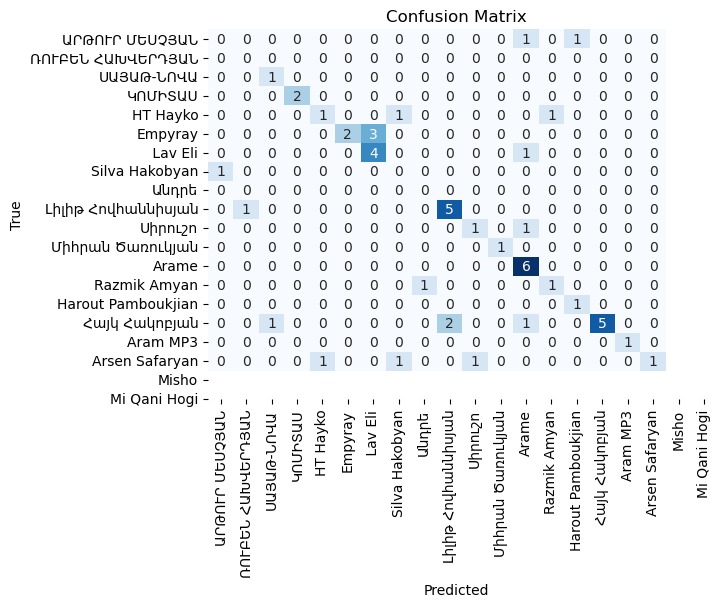

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test,y_pred)
target_names=df.Artist.unique()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 64.71%
F1 Score: 0.60
          Actual Singer    Predicted Singer
176             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
84    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
235             Empyray             ԿՈՄԻՏԱՍ
72    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
209             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
532        Mi Qani Hogi               Misho
180             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
419  Harout Pamboukjian             ԿՈՄԻՏԱՍ
224            HT Hayko            HT Hayko
177             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
200             ԿՈՄԻՏԱՍ             ԿՈՄԻՏԱՍ
333             Սիրուշո  Harout Pamboukjian
442       Հայկ Հակոբյան   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
241             Empyray      ԱՐԹՈՒՐ ՄԵՍՉՅԱՆ
107   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
484            Aram MP3      Silva Hakobyan
525               Misho               Misho
380        Razmik Amyan             ԿՈՄԻՏԱՍ
444       Հայկ Հակոբյան      Silva Hakobyan
81    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
88    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ


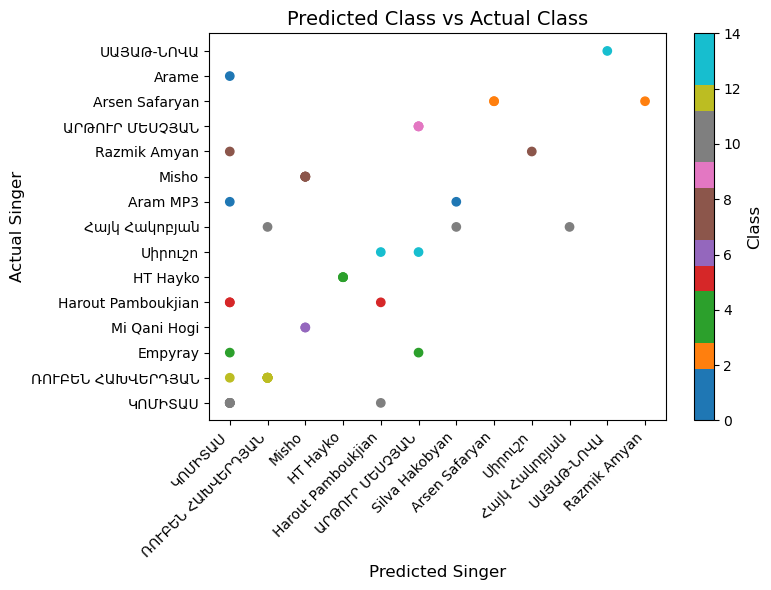

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

lyrics = df['tokens_hy'].astype(str)
singers = df['Artist']

X_train, X_temp, y_train, y_temp = train_test_split(lyrics, singers, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

model = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
f1 = f1_score(y_test, y_pred, average='weighted')
results_df = pd.DataFrame({'Actual Singer': y_test, 'Predicted Singer': y_pred})

print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("F1 Score: {:.2f}".format(f1))
print(results_df)
print("Best Hyperparameters:", best_params)

results_df['Actual Singer'] = pd.Categorical(results_df['Actual Singer'])

# Map categorical labels to numeric values for color representation
results_df['Label'] = results_df['Actual Singer'].cat.codes

# Create a colormap based on the number of unique classes
num_classes = len(results_df['Actual Singer'].unique())
cmap = plt.cm.get_cmap('tab10', num_classes)

# Create a scatter plot of predicted versus actual classes
plt.figure(figsize=(8, 6))
plt.scatter(results_df['Predicted Singer'], results_df['Actual Singer'], c=results_df['Label'], cmap=cmap)

# Customize the plot
plt.xlabel('Predicted Singer', fontsize=12)
plt.ylabel('Actual Singer', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Predicted Class vs Actual Class', fontsize=14)

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Class', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy_percentage = accuracy * 100

results_df = pd.DataFrame({'Actual Singer': y_test, 'Predicted Singer': y_pred})
print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("F1 Score: {:.2f}".format(f1))
print(results_df)


Accuracy: 43.14%
F1 Score: 0.35
          Actual Singer   Predicted Singer
176             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
84    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
235             Empyray            ԿՈՄԻՏԱՍ
72    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
209             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
532        Mi Qani Hogi            ԿՈՄԻՏԱՍ
180             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
419  Harout Pamboukjian            ԿՈՄԻՏԱՍ
224            HT Hayko              Misho
177             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
200             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
333             Սիրուշո            ԿՈՄԻՏԱՍ
442       Հայկ Հակոբյան  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
241             Empyray            ԿՈՄԻՏԱՍ
107   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
484            Aram MP3  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
525               Misho           HT Hayko
380        Razmik Amyan            ԿՈՄԻՏԱՍ
444       Հայկ Հակոբյան            ԿՈՄԻՏԱՍ
81    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ            ԿՈՄԻՏԱՍ
88    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
104   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱ

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy_percentage = accuracy * 100

results_df = pd.DataFrame({'Actual Singer': y_test, 'Predicted Singer': y_pred})
print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("F1 Score: {:.2f}".format(f1))
print("Best Hyperparameters:", best_params)
print(results_df)


Accuracy: 49.02%
F1 Score: 0.40
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
          Actual Singer   Predicted Singer
176             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
84    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
235             Empyray  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
72    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
209             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
532        Mi Qani Hogi  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
180             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
419  Harout Pamboukjian            ԿՈՄԻՏԱՍ
224            HT Hayko              Misho
177             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
200             ԿՈՄԻՏԱՍ            ԿՈՄԻՏԱՍ
333             Սիրուշո            Սիրուշո
442       Հայկ Հակոբյան  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
241             Empyray  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
107   ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ  ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅԱՆ
484            Aram MP3      Հայկ Հակոբյան
525               Misho              Misho
380        Razmik Amyan            ԿՈՄԻՏԱՍ
444       Հայկ Հակոբյան            ԿՈՄԻՏԱՍ
81    ՌՈՒԲԵՆ ՀԱԽՎԵՐԴՅ